#Sentiment Analysis of Customer Reviews

## Project Overview

E-commerce platforms need to understand customer feedback, which often comes in the form of product reviews. This feedback, if analyzed properly, can help businesses identify issues, recognize trends, and improve products or services. Given that we are working with customer reviews, the task is to determine the overall sentiment of these reviews (positive, negative, neutral).

### Task

Perform sentiment analysis on product reviews, classify them into three categories (positive, negative, and neutral), and extract actionable insights to guide product improvement.

### Tools & Techniques

**Python**: For data preprocessing, sentiment analysis, and visualization.

**Excel**: For further analysis and visual representation.

## Exploratory Data Analysis

### Data Collection, Data Cleaning and Preprocessing

In [ ]:
!pip install nltk pandas

import nltk
import pandas as pd
import matplotlib.pyplot as plt
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df = pd.read_csv('/content/flipkart_product.csv', encoding='unicode_escape')
df.shape

(189874, 5)

In [ ]:
# Display the first few rows of the DataFrame to understand its structure
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Remove rows with missing values (if any)
df.dropna(inplace=True)

# Check for duplicate rows and remove them
df.drop_duplicates(inplace=True)

# Data Cleaning for special symbols
def clean_text(txt):
    # Remove special characters and numbers
    txt = re.sub(r'[^a-zA-Z\s]', '', txt, re.I|re.A)
    # Remove extra whitespace
    txt = re.sub(' +', ' ', txt)
    return txt

df['Review'] = df['Review'].apply(clean_text)

# Display the updated DataFrame information
print(df.info())
print(df.describe()) # For numerical columns summary

                                         ProductName     Price Rate  \
0  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    5   
1  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    5   
2  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    3   
3  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    1   
4  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    3   

            Review                                            Summary  
0           Super!  Great cooler.. excellent air flow and for this...  
1          Awesome             Best budget 2 fit cooler. Nice cooling  
2             Fair  The quality is good but the power of air is de...  
3  Useless product                 Very bad product it's a only a fan  
4             Fair                                      Ok ok product  
ProductName     0
Price           1
Rate            1
Review          4
Summary        14
dtype: int64
<class 'pandas.core.frame.DataFrame'>


In [ ]:
df.shape

(165004, 5)

In [ ]:
df

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product
...,...,...,...,...,...
189862,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,4,Pretty good,Best for winter
189865,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Worth every penny,Very nice cream
189866,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Great product,It's a nice product...thanks very much to Flip...
189867,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Best in the market,Thanks â¤ï¸


## Vander Sentiment analyzer

In [ ]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze the sentiment of a review
def analyze_sentiment(review):
    scores = analyzer.polarity_scores(str(review))
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Analyze sentiment for each review
df['Sentiment'] = df['Review'].apply(analyze_sentiment)

## Visualization of sentiments

In [ ]:
# Analyze sentiment for each review
df['Sentiment'] = df['Review'].apply(analyze_sentiment)

# Display the first few rows with sentiment labels
print(df[['Review', 'Sentiment']].head(10))

# Calculate overall sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
print("\nOverall Sentiment Distribution:")
sentiment_counts

               Review Sentiment
0               Super  Positive
1             Awesome  Positive
2                Fair  Positive
3     Useless product  Negative
4                Fair  Positive
5             Awesome  Positive
6  Highly recommended  Positive
7                Nice  Positive
8      Unsatisfactory   Neutral
9     Worth the money  Positive

Overall Sentiment Distribution:


,count
Sentiment,
Positive,114323
Neutral,36367
Negative,14314


### Visualization using Pie Chart

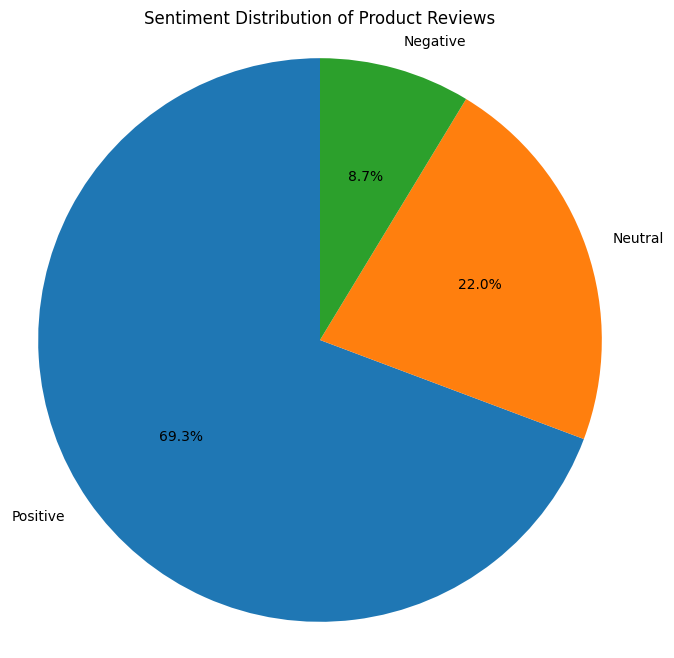

In [ ]:
# Calculate overall sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution of Product Reviews')
plt.axis('equal')
plt.show()

## Export Result to Excel

In [ ]:
# Export the cleaned data and sentiment analysis results to Excel
df.to_csv('sentiment_analysis_results.csv', index= False)

## Result

After performing sentiment analysis on the customer reviews, we are able to:
- Categorize reviews into positive, negative, and neutral.
- Visualize the sentiment distribution to understand customer preferences.
- Use insights from positive and negative reviews to improve products and customer service.

## Challenges & Solutions

### Challenges:
1. **Data Quality**: Customer reviews can contain slang, misspellings, or emojis, which may affect sentiment analysis accuracy. The text cleaning process helps mitigate this.
2. **Subtle Sentiments**: Sometimes, customer reviews may be subtle or sarcastic, and tools like VADER might not always detect them. For more accurate results, a machine learning-based approach can be considered.

### Solution:
1. **Preprocessing**: Clean the text thoroughly by removing unnecessary characters, stop words, and special symbols.
2. **Regular Sentiment Analysi**s: Conduct sentiment analysis regularly to keep track of customer feedback and product performance.
3. **Actionable Insights**: Use the analysis results to highlight what customers love and where they want improvements, guiding product development or marketing strategies.

## Conclusion

This **Sentiment Analysis of Customer Reviews** project allows you to extract valuable insights from customer feedback, helping improve products and services. By using Python for text analysis and Excel for visualization, you can easily interpret large volumes of customer reviews and drive data-backed decisions.